In [36]:
%cd /home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm/ 

/home/luzinsan/Documents/Obsidian/ML/Innopolis/material/1 semester/HDDA/labs/midterm


/home/luzinsan/.cache/pypoetry/virtualenvs/ml-venv-uqlfkjfM-py3.11/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
import numpy as np
from numpy.linalg import svd

In [3]:
def compute_norms(x):
    norm_1 = np.linalg.norm(x, ord=1)
    norm_2 = np.linalg.norm(x, ord=2)
    norm_inf = np.linalg.norm(x, ord=np.inf)
    return norm_2, norm_1, norm_inf

x = np.array([1, -2, 3, -4])
norms = compute_norms(x)
print(f"2-norm: {norms[0]}, 1-norm: {norms[1]}, Infinity norm: {norms[2]}")

2-norm: 5.477225575051661, 1-norm: 10.0, Infinity norm: 4.0


In [4]:
def triangle_inequality(x, y, norm_order=2):
    return np.linalg.norm(x + y, norm_order) <= np.linalg.norm(x, norm_order) + np.linalg.norm(y, norm_order)

x = np.array([1, -2, 3])
y = np.array([4, -1, 0])
print("Triangle inequality holds:", triangle_inequality(x, y))

Triangle inequality holds: True


In [8]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Matrix operations
print("Matrix A:\n", A)
print("Matrix B:\n", B)

# Matrix multiplication
print("A * B:\n", A @ B)
# Transpose
print("A Transpose:\n", A.T)
# Inverse
print("A Inverse:\n", np.linalg.inv(A))

Matrix A:
 [[1 2]
 [3 4]]
Matrix B:
 [[5 6]
 [7 8]]
A * B:
 [[19 22]
 [43 50]]
A Transpose:
 [[1 3]
 [2 4]]
A Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]


In [9]:
def matrix_properties(A):
    det = np.linalg.det(A)
    rank = np.linalg.matrix_rank(A)
    return det, rank

A = np.array([[2, 3], [1, 4]])
det, rank = matrix_properties(A)
print(f"Determinant: {det}, Rank: {rank}")

Determinant: 5.000000000000001, Rank: 2


In [25]:
def scalar_projection(a, b):
    return (a @ b) / np.linalg.norm(a)

def vector_projection(a, b):
    projection = ((a @ b) / np.linalg.norm(a)**2) * a
    # projection = ((a @ b) / (a @ a)) * a
    return projection

# Example usage
a = np.array([1, 2])
b = np.array([3, 4])
print("Vector projection of b onto a:", vector_projection(a, b))
print("Scalar projection of b onto a:", scalar_projection(a, b))

Vector projection of b onto a: [2.2 4.4]
Scalar projection of b onto a: 4.919349550499537


In [26]:
def is_orthogonal(a, b):
    return np.isclose(np.dot(a, b), 0)

a = np.array([1, 2])
b = np.array([-2, 1])
print("Are a and b orthogonal?", is_orthogonal(a, b))

Are a and b orthogonal? True


In [64]:
def reconstruct_matrix(U, S, Vt):
    return U @ np.diag(S) @ Vt

def reconstruct_image(U, S, Vt, k):
    return U[:, :k] @ np.diag(S)[:k, :k] @ Vt[:k, :]

def reconstruction_error(A, with_A):
    return np.linalg.norm(A - with_A)

In [ ]:
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])
U, S, Vt = svd(A)
print("Matrix A:\n", A)
print("\nU Matrix:\n", U)
print("\nSingular Values:\n", S)
print("\nV^T Matrix:\n", Vt)

A_reconstructed = reconstruct_matrix(U, S, Vt)
print("Reconstructed Matrix A:\n", A_reconstructed)
reconstruction_error_A = reconstruction_error(A, A_reconstructed)
print(f"Reconstruction Error: {reconstruction_error_A}")

Matrix A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

U Matrix:
 [[-0.13472212 -0.82574206  0.53800026 -0.10274101]
 [-0.3407577  -0.4288172  -0.64075506  0.53798973]
 [-0.54679327 -0.03189234 -0.33249068 -0.76775644]
 [-0.75282884  0.36503251  0.43524547  0.33250772]]

Singular Values:
 [3.86226568e+01 2.07132307e+00 2.69766687e-16 3.52519360e-17]

V^T Matrix:
 [[-0.4284124  -0.47437252 -0.52033264 -0.56629275]
 [ 0.71865348  0.27380781 -0.17103786 -0.61588352]
 [ 0.52619521 -0.58826369 -0.40205823  0.46412672]
 [-0.15204804  0.59493346 -0.73372282  0.29083739]]
Reconstructed Matrix A:
 [[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]
Reconstruction Error: 9.945640348601413e-15


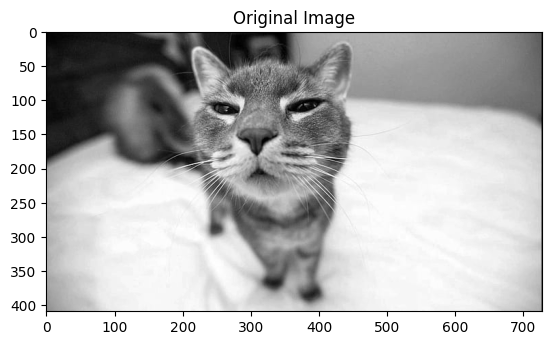

Image size: 298480 pixils
Original Size: 698494, Compressed Size for k=10: 11390, Size Ration= 0.0163


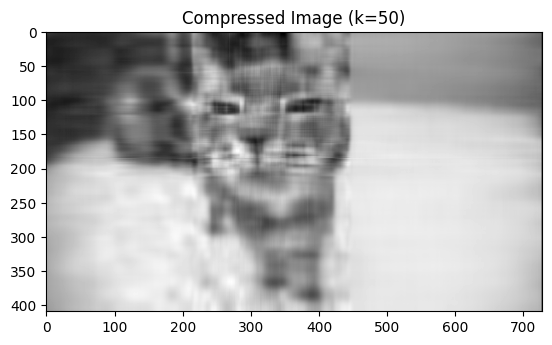

Reconstruction Error: 31.38295317175367


In [ ]:
from scipy import io
import matplotlib.pyplot as plt
# Example with k = 50 for image
image = io.imread('../week2/pretty_cat.jpg', as_gray=True)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()
print(f'Image size: {np.prod(image.shape)} pixils')


U, S, Vt = svd(image)
k = 10
original_size = U.size + S.size + Vt.size
compressed_size_k = U[:, :k].size + S[:k].size + Vt[:k, :].size
print(f"Original Size: {original_size}, Compressed Size for k={k}: {compressed_size_k}, Size Ration={compressed_size_k/original_size: 0.3}")

compressed_image = reconstruct_image(U, S, Vt, k)
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image (k=50)')
plt.show()
reconstruction_error_image = reconstruction_error(image, compressed_image)
print(f"Reconstruction Error: {reconstruction_error_image}")


**Linear Regression** using the **Normal Equation** (**Least squared method**): $ \theta = (X^T X)^{-1} X^T$

**Linear Regression** using the **SVD**: $ \theta = V \frac{1}{\Sigma} U^T$ This method is numerically more stable, especially for ill-conditioned or high-dimensional matrices.

In [ ]:
from sklearn.linear_model import LinearRegression

def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y


def svd_least_squares(X, y):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    return Vt.T @ np.diag(1/S) @ U.T @ y

def scikit_least_squares(X, y):
    model = LinearRegression(fit_intercept=False)
    model.fit(X, y)
    return model.coef_

In [ ]:
# Prepare the data (add intercept term)
X = np.c_[np.ones(len(X)), X]
y = x2

Theta: [0.45085577 0.41793849]


$$gradient = 2* X^T (X \theta - y)$$
$$\theta = \theta - \alpha * \text{gradient}$$

In [ ]:
from sklearn.metrics import r2_score

def gradient_descent(X, y, alpha=0.01, iterations=1000, batch_size=32):
    m, n = X.shape
    theta = np.zeros(n)
    for i in range(iterations):
        idx = np.random.choice(m, batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]
        gradient = (2 / batch_size) * (X_batch.T @ (X_batch @ theta - y_batch))
        theta -= alpha * gradient
        alpha *= 0.999
    return theta

y_pred = X @ theta_gd
print("R2 score:", r2_score(y_pred, y))

Time taken by Gradient Descent: 8.706827163696289
Difference from true values: 0.01813483657971107
R2 score: 0.9999972674883657


**Ridge Regression (L2 Regularization)** is a solution to overfitting and multicollinearity in high-dimensional data.
 $$\theta = (X^T X + \lambda I)^{-1} X^T y$$

In [ ]:
def ridge_regression(X, y, lambda_):
   I = np.eye(X.shape[1])
   return np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

Theta (Ridge): [ 1.78346688e+01  3.91461394e-03  4.57692732e+00 ... -1.53678173e-02
  3.20060312e+01  1.40253494e-03]


- Logistic Regression predicts a probability $( P(y=1|X) )$ using the sigmoid function:
$$
  h_{\theta}(X) = \frac{1}{1 + e^{-\theta^T X}}
$$
- The **loss function** for Logistic Regression (binary cross-entropy loss) is:
$$
  J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
$$

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient Descent for Logistic Regression
def gradient_descent(X, y, alpha, iterations):
    m = len(y)
    costs = []
    # Initialize theta
    theta = np.zeros((X.shape[1], 1))
    
    for _ in range(iterations):
        gradient = (1 / m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= alpha * gradient
        costs.append(compute_cost(X, y, theta))
    return theta, costs

# Predict function
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5


In [ ]:
# Generate some binary classification data
X = np.c_[np.ones(len(X)), X]  # Add intercept

# Train Logistic Regression with Gradient Descent
theta, costs = gradient_descent(X, y, alpha=0.01, iterations=10000)
print("Learned parameters (theta):", theta.ravel())

# Accuracy of predictions
preds = predict(X, theta)
accuracy = np.mean(preds == y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Learned parameters (theta): [-0.17466043  3.73161667  3.74056214]
Accuracy: 99.00%


In [104]:
# Using scikit-learn's Logistic Regression
model = LogisticRegression(fit_intercept=True, solver='lbfgs', penalty=None)
model.fit(X[:, 1:], y.ravel())  # Omit the intercept column since fit_intercept is True

# Predict and compare results
y_pred = model.predict(X[:, 1:])
accuracy_sklearn = accuracy_score(y, y_pred) * 100
print(f"Accuracy (scikit-learn): {accuracy_sklearn:.2f}%")

# Compare learned parameters
print("Learned parameters (scikit-learn):", model.intercept_, model.coef_)

Accuracy (scikit-learn): 100.00%
Learned parameters (scikit-learn): [-0.84650206] [[118.52469511 112.51512888]]


**K-means**

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce dimensions with PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

k = 10
# k-means with random initialization
kmeans_random = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
%time kmeans_random.fit(X_pca)

# k-means with k-means++ initialization
kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
%time kmeans_pp.fit(X_pca)


print(f'Inertia with random initialization: {kmeans_random.inertia_}')
print(f'Inertia with k-means++ initialization: {kmeans_pp.inertia_}')

print(f'Iterations with random initialization: {kmeans_random.n_iter_}')
print(f'Iterations with k-means++ initialization: {kmeans_pp.n_iter_}')


# Silhouette Score for random initialization
silhouette_random = silhouette_score(X_pca, kmeans_random.labels_)
print(f'Silhouette Score with random initialization: {silhouette_random}')

# Silhouette Score for k-means++ initialization
silhouette_pp = silhouette_score(X_pca, kmeans_pp.labels_)
print(f'Silhouette Score with k-means++ initialization: {silhouette_pp}')

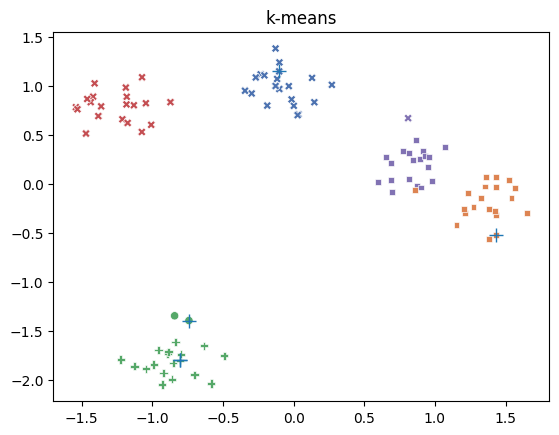

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random

# Return the most frequently occuring element in a list.
def most_common(lst):
    return max(set(lst), key=lst.count)

# Return euclidean distances between a point & a dataset
def euclidean(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))


class KMeans:

    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X_train):

        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]

        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx = np.random.choice(range(len(X_train)), size=1, p=dists)[0]  # Indexed @ zero to get val, not array of val
            self.centroids += [X_train[new_centroid_idx]]

        # This method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]

        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = self.centroids
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1

    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)

        return centroids, centroid_idxs


# Create a dataset of 2D distributions
centers = 5
X_train, true_labels = make_blobs(n_samples=100, centers=centers, random_state=42)
X_train = StandardScaler().fit_transform(X_train)

# Fit centroids to dataset
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

# View results
class_centers, classification = kmeans.evaluate(X_train)
sns.scatterplot(x=[X[0] for X in X_train],
                y=[X[1] for X in X_train],
                hue=true_labels,
                style=classification,
                palette="deep",
                legend=None
                )
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         )
plt.title("k-means")
plt.show()